In [70]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [71]:
df = pd.read_csv('demolitions_pse_isr_conflict_2004-01_to_2023-08.csv')
df.head()


,date_of_demolition,locality,district,area,housing_units,people_left_homeless,minors_left_homeless,type_of_sturcture,reason_for_demolition
0,2023-08-30,Tarqumya,Hebron,west-bank,2,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
1,2023-08-29,al-Bweirah,Hebron,west-bank,1,0,0,Residental,Demolition on the pretext of unlawful construc...
2,2023-08-24,Shufah,Tulkarm,west-bank,1,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
3,2023-08-21,Bidu,al-Quds,west-bank,8,0,0,Non Resedential,Demolition on the pretext of unlawful construc...
4,2023-08-21,Bidu,al-Quds,west-bank,3,0,0,Non Resedential,Demolition on the pretext of unlawful construc...


      date_of_demolition
0             1693353600
1             1693267200
2             1692835200
3             1692576000
4             1692576000
...                  ...
5760          1072915200
5761          1072915200
5762          1072915200
5763          1072915200
5764          1072915200

[5765 rows x 1 columns]
      date_of_demolition  district  people_left_homeless  cluster
0             1693353600         4                     0        3
1             1693267200         4                     0        3
2             1692835200        15                     0        4
3             1692576000        16                     0        4
4             1692576000        16                     0        4
...                  ...       ...                   ...      ...
5760          1072915200         1                     6        1
5761          1072915200         1                     2        1
5762          1072915200         1                    10        1
5763          1

c:\Anaconda\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


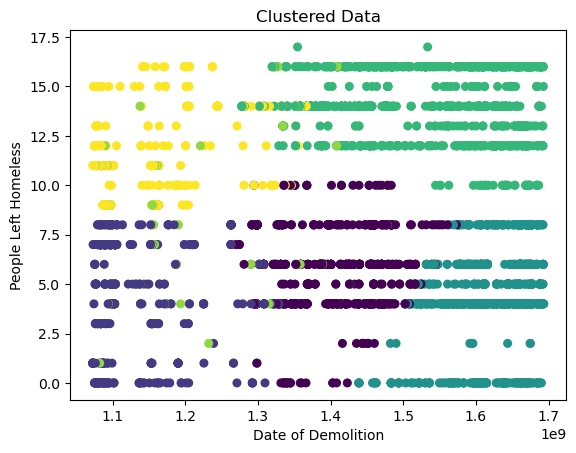

In [72]:

data = df
data['date_of_demolition'] = pd.to_datetime(data['date_of_demolition'])
data['date_of_demolition'] = (data['date_of_demolition'].astype('datetime64[ns]').astype('int64') // 10**9).astype(int)

# data['date_of_demolition'] = (data['date_of_demolition'].astype('int64') // 10**9).astype(int)  # Преобразование даты в числовой формат
print(data[['date_of_demolition']])
label_encoder = LabelEncoder()
data['locality'] = label_encoder.fit_transform(data['locality'])
data['district'] = label_encoder.fit_transform(data['district'])


scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[['date_of_demolition', 'district', 'people_left_homeless']])

kmeans = KMeans(n_clusters=7)
data['cluster'] = kmeans.fit_predict(normalized_data)

# Вывод результатов кластеризации
print(data[['date_of_demolition', 'district', 'people_left_homeless', 'cluster']])
plt.scatter(data['date_of_demolition'], data['district'], c=data['cluster'], cmap='viridis', marker='o', s=30)
plt.title('Clustered Data')
plt.xlabel('Date of Demolition')
plt.ylabel('People Left Homeless')
plt.show()

c:\Anaconda\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\envs\sklearn-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

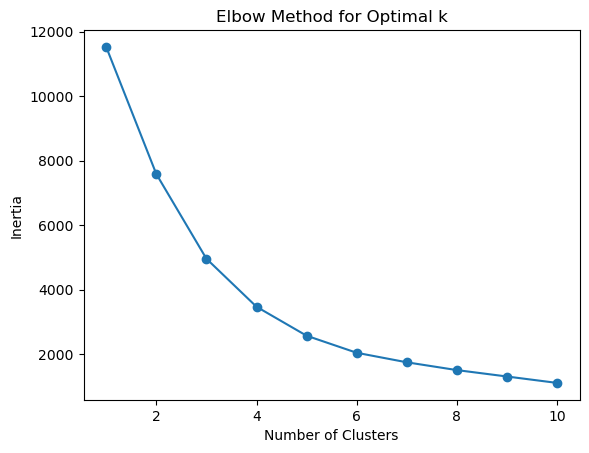

In [24]:


inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()